# Shared Bikes Demand Prediction

#### Problem Statement:

A US bike-sharing provider `BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands


The solution is divided into the following sections: 
- Data understanding and exploration
- Data Visualisation 
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore') #to ignore the warnings

In [3]:
# Reading the dataset
BS_day = pd.read_csv("day.csv")

In [4]:
# Let's take a look at the first few rows
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Let's look at the number of rows and columns in the dataset
BS_day.shape

(730, 16)

In [6]:
# Understanding the feature names in the dataset
BS_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Getting statistical insights of the features
BS_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Summary of the dataset: 730 rows, 16 columns, no null values
print(BS_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

In [9]:
# Assigning string values to different seasons instead of numeric values, for better interpretation

# 1=spring
BS_day.loc[(BS_day['season'] == 1) , 'season'] = 'spring'

# 2=summer
BS_day.loc[(BS_day['season'] == 2) , 'season'] = 'summer'

# 3=fall
BS_day.loc[(BS_day['season'] == 3) , 'season'] = 'fall'

# 4=winter
BS_day.loc[(BS_day['season'] == 4) , 'season'] = 'winter'

In [10]:
# checking the first few rows after the conversion
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
BS_day['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
# year (0: 2018, 1:2019) checking the number of data for each year in the dataset
BS_day['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [13]:
# Assigning string values to different months instead of numeric values for better interpretation.
# A function to map the actual numbers to categorical levels.
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the required column
BS_day[['mnth']] = BS_day[['mnth']].apply(object_map)

In [14]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
BS_day['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [15]:
# whether day is a holiday or not (0: No, 1: Yes) and checking the count for each category in the dataset
BS_day['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [16]:
# Assigning string values to weekdays instead of numeric values for better interpretation
# A function has been created to map the actual numbers to categorical levels.
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the required column
BS_day[['weekday']] = BS_day[['weekday']].apply(str_map)

In [17]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
BS_day['weekday'].astype('category').value_counts()

Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: weekday, dtype: int64

In [18]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
BS_day['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [19]:
# Replacing long weathersit names into string values for better readability and understanding

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
BS_day.loc[(BS_day['weathersit'] == 1) , 'weathersit'] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
BS_day.loc[(BS_day['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
BS_day.loc[(BS_day['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
BS_day.loc[(BS_day['weathersit'] == 4) , 'weathersit'] = 'D'

In [20]:
# Extracting the type of weather situations present in the data
BS_day['weathersit'].unique()

array(['B', 'A', 'C'], dtype=object)

In [21]:
# Taking count based on weather situations
BS_day['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [22]:
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [23]:
# For carrying out Auto EDA, installing sweetviz
import sweetviz as sv
sweet_report = sv.analyze(BS_day)
sweet_report.show_html('sweet_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 2. Data Visualisation for understanding the data

Objectives are the following:
- Understanding the distribution of various numeric variables 
- Detecting multicollinearity 
- Identify if some predictors directly have a strong association with the outcome variable

Libraries used are `matplotlib` and `seaborn`.

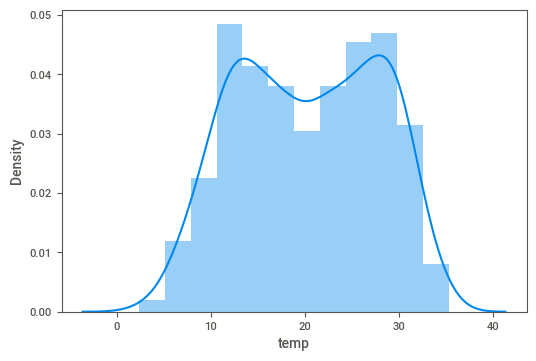

In [24]:
# temperature
sns.distplot(BS_day['temp'])
plt.show()

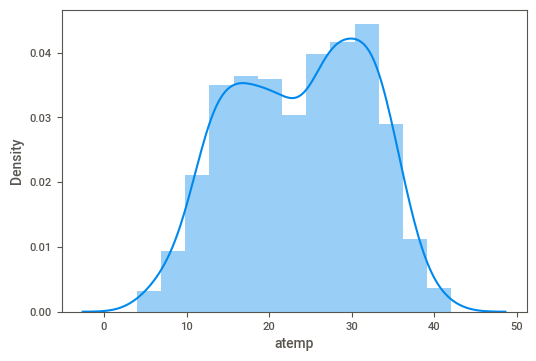

In [25]:
# feeling temperature
sns.distplot(BS_day['atemp'])
plt.show()

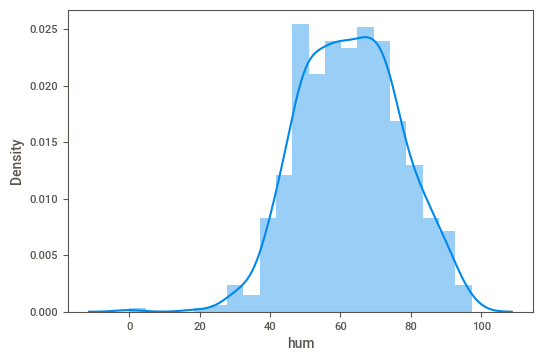

In [26]:
# humidity
sns.distplot(BS_day['hum'])
plt.show()

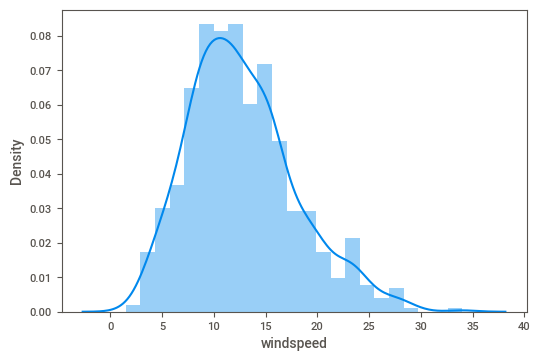

In [27]:
# wind speed
sns.distplot(BS_day['windspeed'])
plt.show()

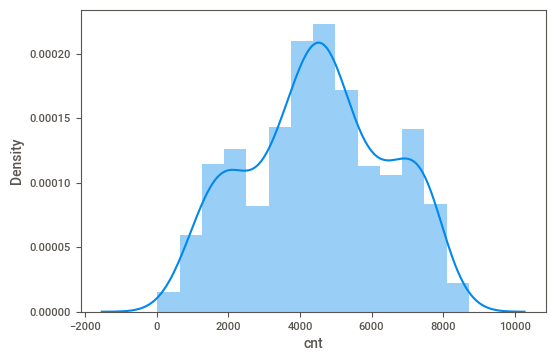

In [28]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(BS_day['cnt'])
plt.show()

In [29]:
# Converting date to datetime format
BS_day['dteday']=BS_day['dteday'].astype('datetime64')

In [30]:
# All categorical variables in the dataset
BS_day_categorical=BS_day.select_dtypes(exclude=['float64','datetime64','int64'])
print(BS_day_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [31]:
# Viewing the categroical datset entries
BS_day_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A
...,...,...,...,...
725,spring,Dec,Sat,B
726,spring,Dec,Sun,B
727,spring,Dec,Mon,B
728,spring,Dec,Tues,A


#### Visualising Categorical Variables

Plotting a boxplot for some of these variables.

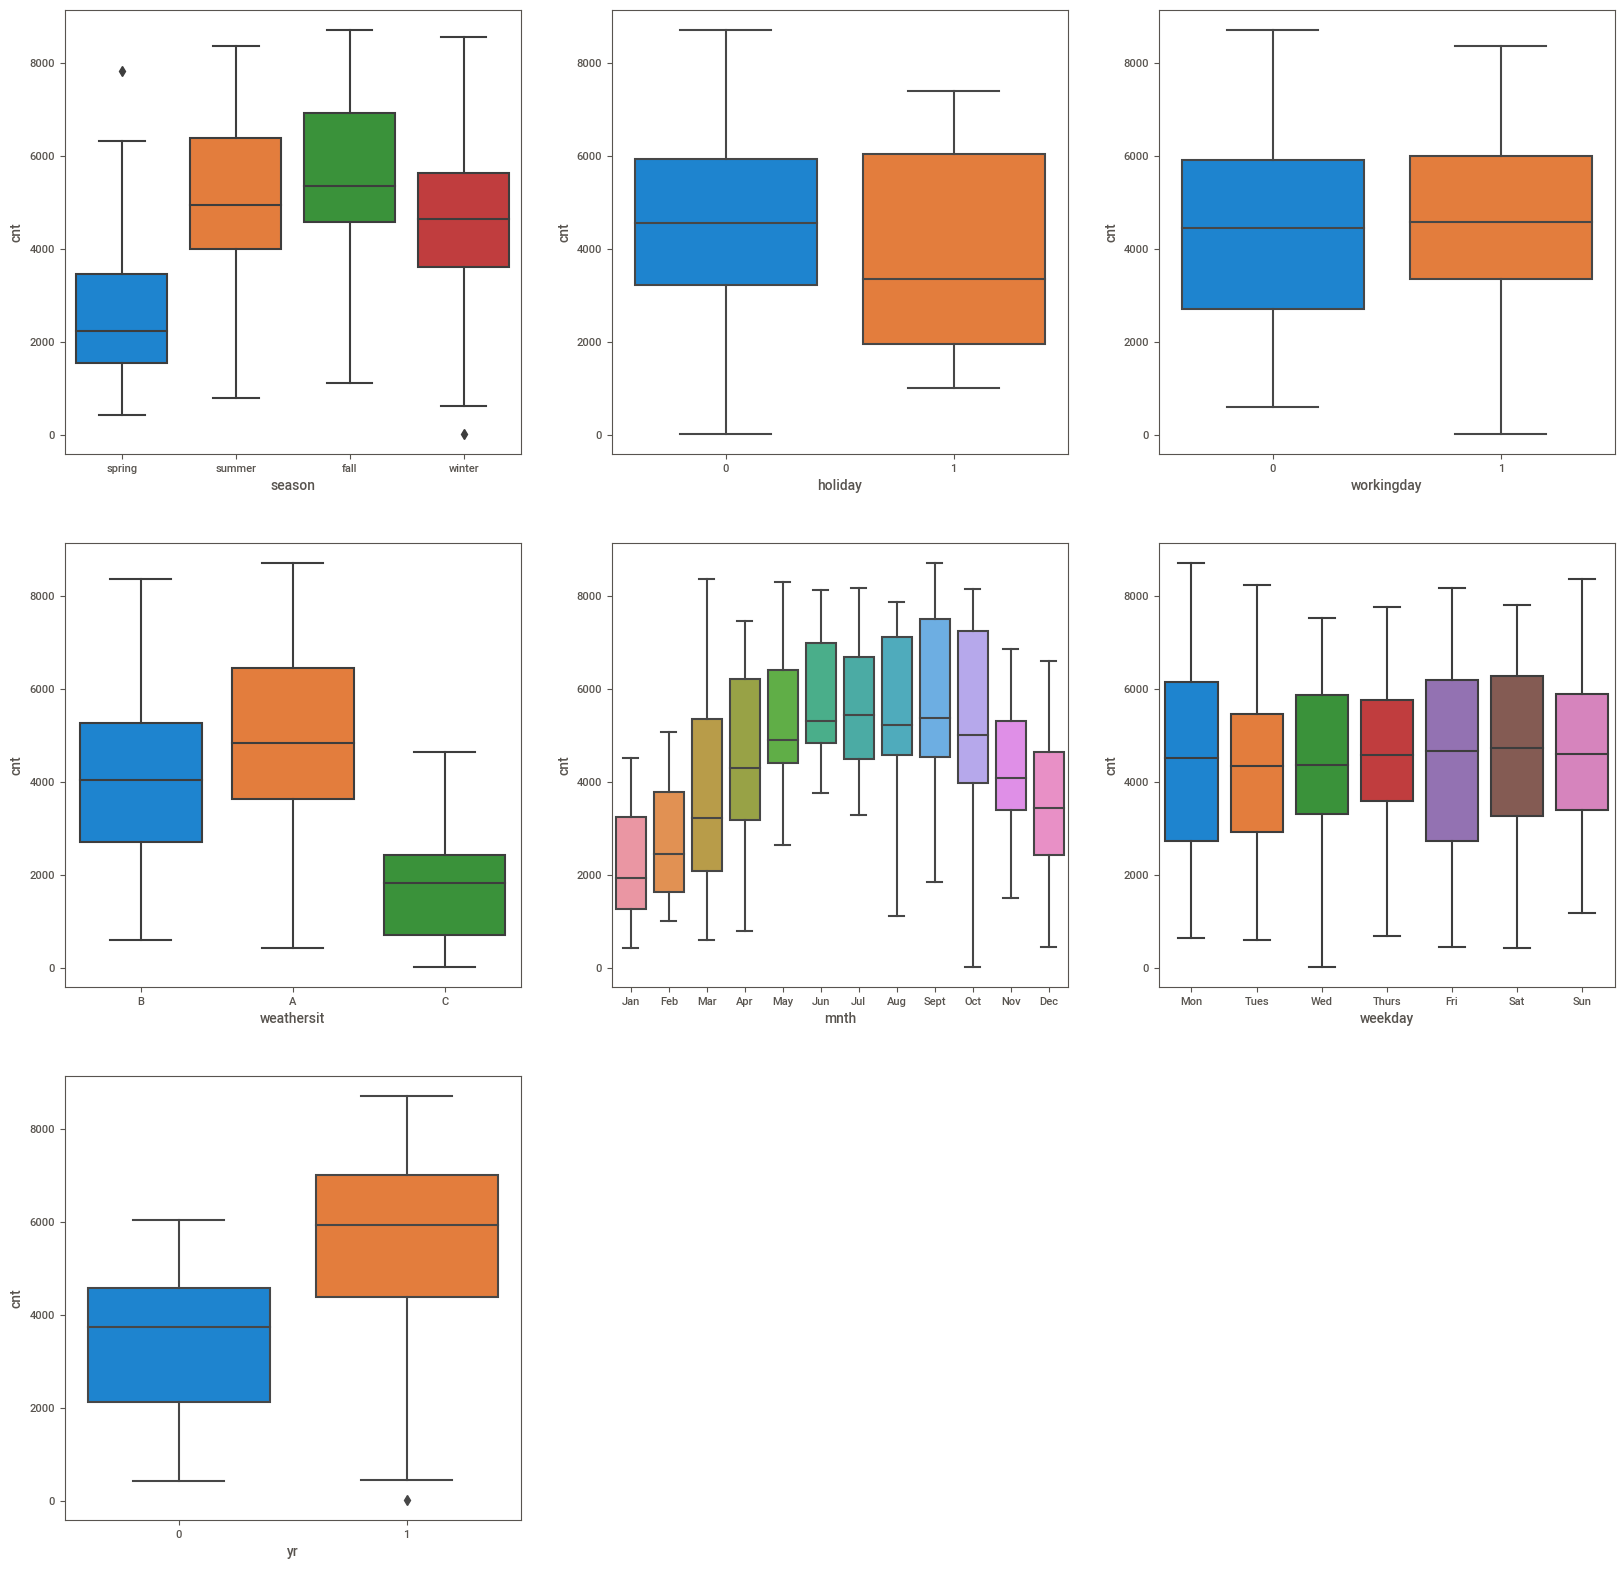

In [32]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BS_day)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = BS_day)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = BS_day)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BS_day)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = BS_day)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = BS_day)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = BS_day)
plt.show()
#plt.subplot(3,3,8)
#sns.boxplot(x = 'date', y = 'cnt', data = BS_day)


#### Visualising Numeric Variables

Plotting a pairplot of all the numeric variables

In [33]:
# Converting "casual","registered" and "cnt" numeric variables to float. 
# This step is performed to seperate out categorical variables like 'yr','holiday','workingday' which have binary values in them
IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    BS_day[var] = BS_day[var].astype("float")


In [34]:
# All numeric variables in the dataset
BS_day_numeric = BS_day.select_dtypes(include=['float64'])
BS_day_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


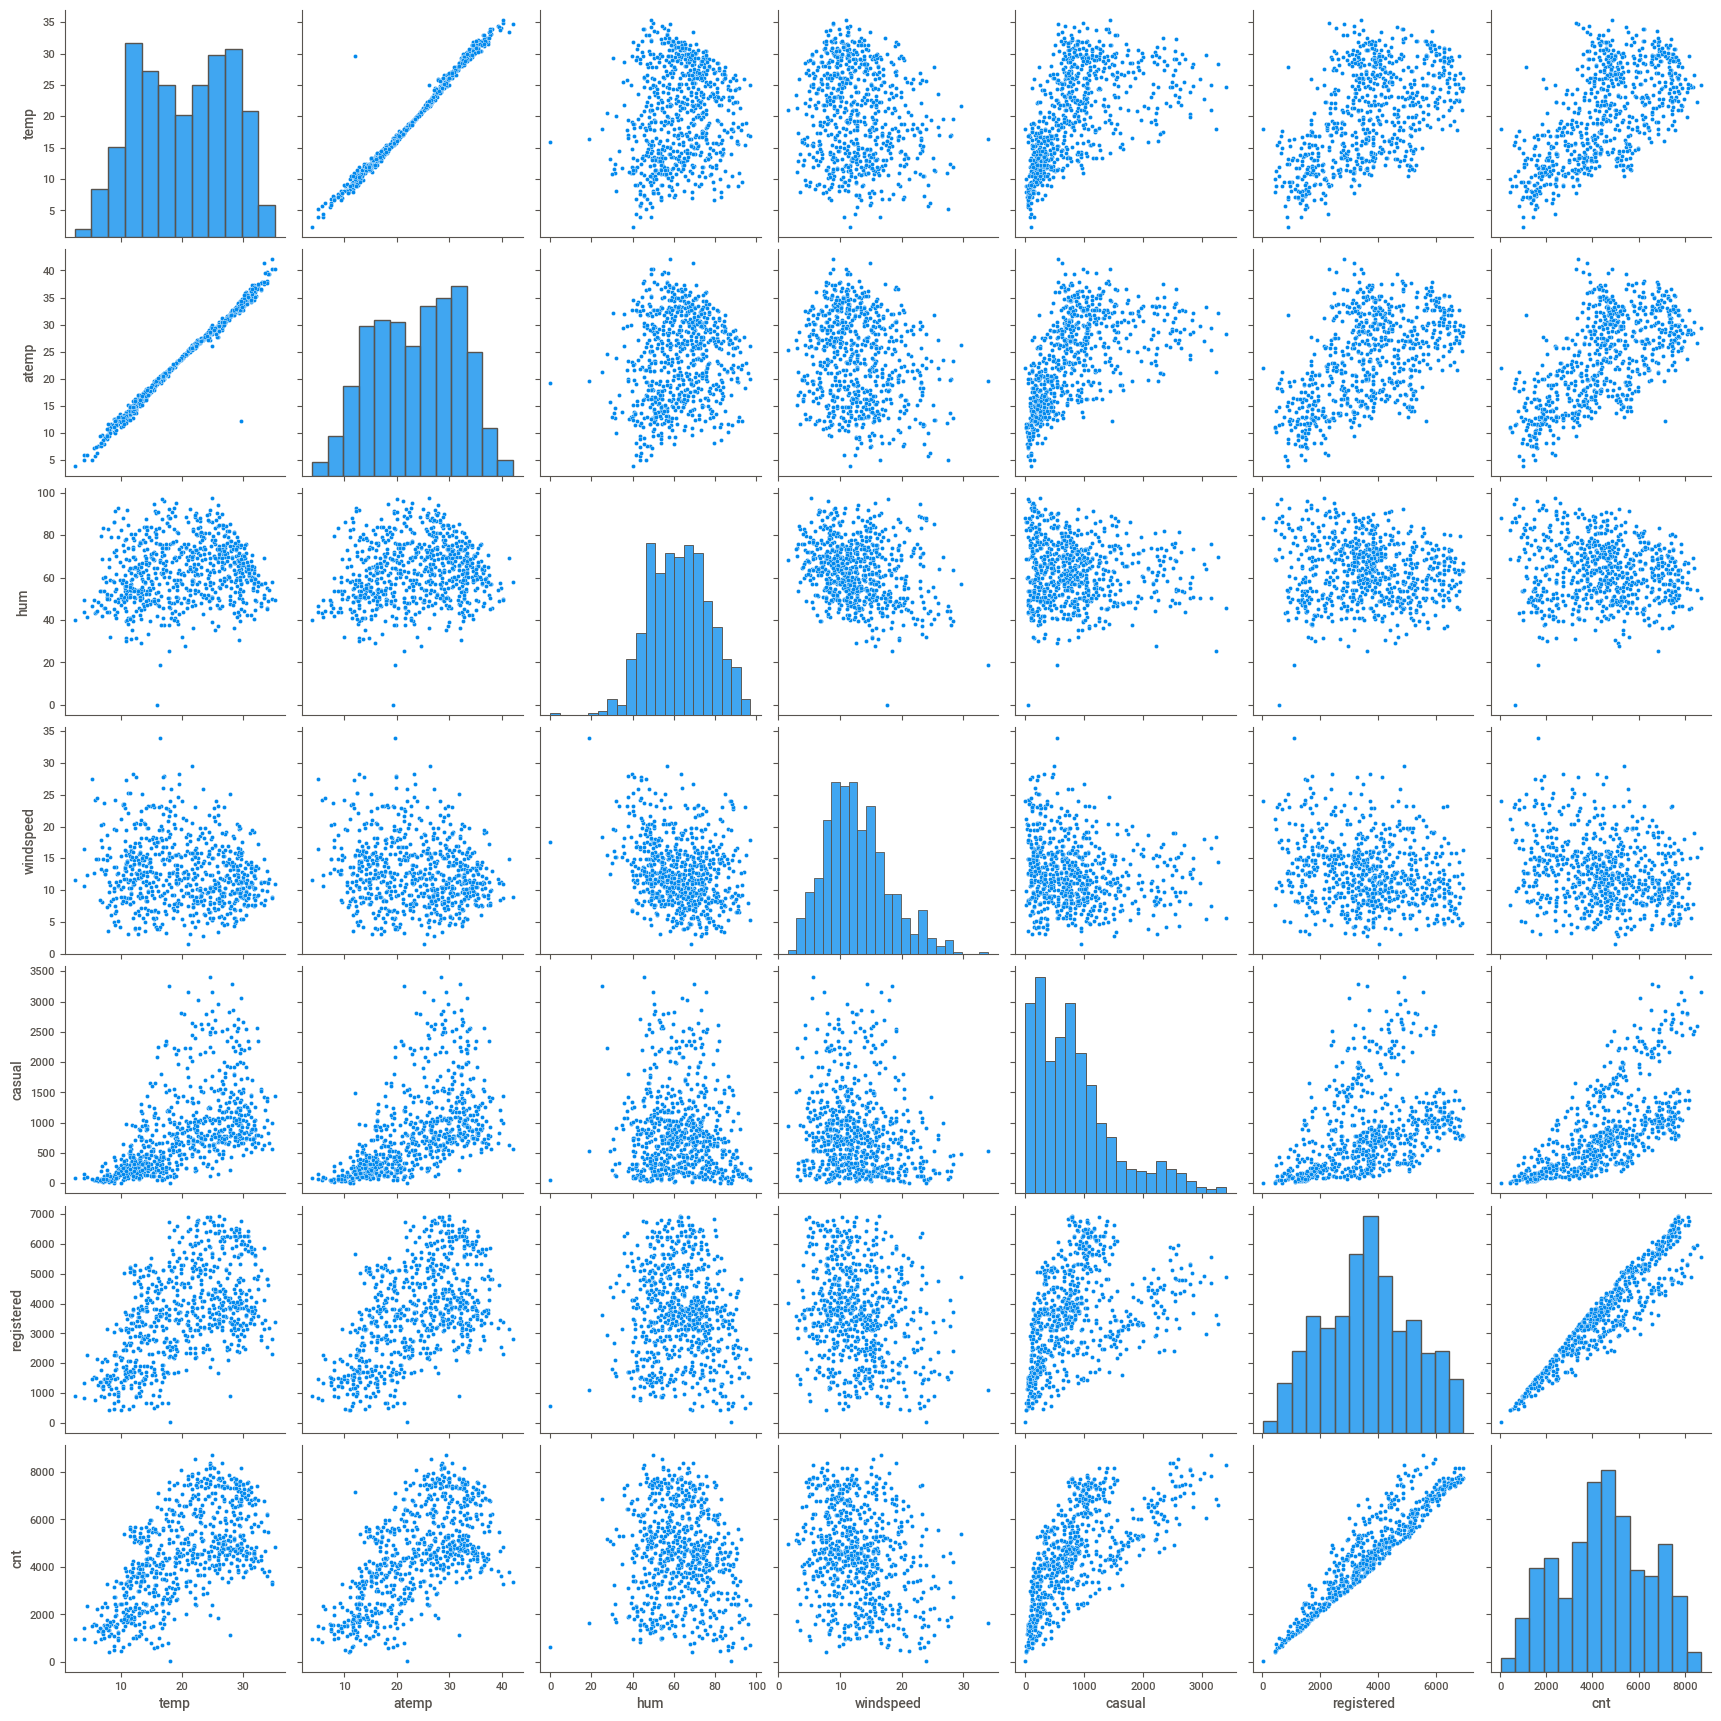

In [35]:
# Pairwise scatter plot
sns.pairplot(BS_day_numeric)
plt.show()

We can better plot correlation matrix between variables to know the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [36]:
# Correlation matrix
cor = BS_day_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


Let's plot the correlations on a heatmap for better visualisation

<AxesSubplot:>

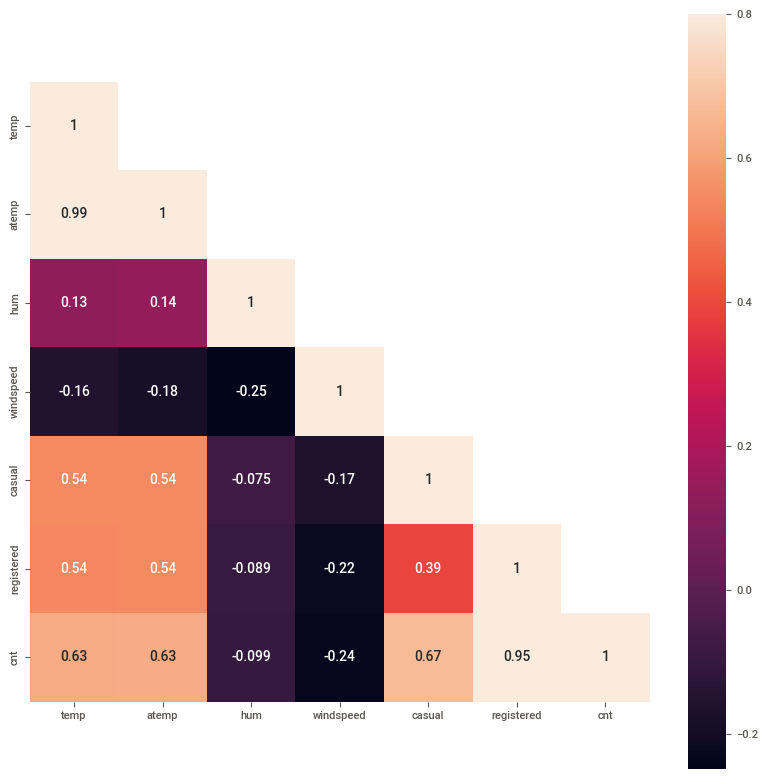

In [37]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:
- Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is high with 'atemp'. We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.

- Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Correlation among independent variables:
- Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.


Thus, while building the model, we'll have to pay attention to multicollinearity.

In [38]:
#removing atemp as it is highly correlated with temp
BS_day.drop('atemp',axis=1,inplace=True)    

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

In [39]:
# Subset all categorical variables
BS_day_categorical=BS_day.select_dtypes(include=['object'])

#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers. 

For this, we will use something called `dummy variables`.

In [40]:
# Convert into dummies
BS_day_dummies = pd.get_dummies(BS_day_categorical, drop_first=True)
BS_day_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Drop categorical variable columns
BS_day = BS_day.drop(list(BS_day_categorical.columns), axis=1)

In [42]:
# Concatenate dummy variables with the original dataframe
BS_day = pd.concat([BS_day, BS_day_dummies], axis=1)

In [43]:
# Let's check the first few rows
BS_day.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
BS_day=BS_day.drop(['instant','dteday'], axis = 1, inplace = False)
BS_day.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,0,0,0


## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [45]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(BS_day, train_size=0.7, test_size=0.3, random_state=100)

In [46]:
df_train #viewing the training dataset

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,0,0,0,0,0,1,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,1,0,0,0,0,0,1,0


### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

Let's scale all these columns using MinMaxScaler. You can use any other scaling method as well; it is totally up to you.

In [47]:
from sklearn.preprocessing import MinMaxScaler 

In [48]:
scaler = MinMaxScaler()

In [49]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [50]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,0,...,0,0,0,0,0,0,0,1,1,0
578,1,0,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,1,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,0,...,0,0,1,0,0,0,0,0,1,0


As expected, the variables have been appropriately scaled.

In [51]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


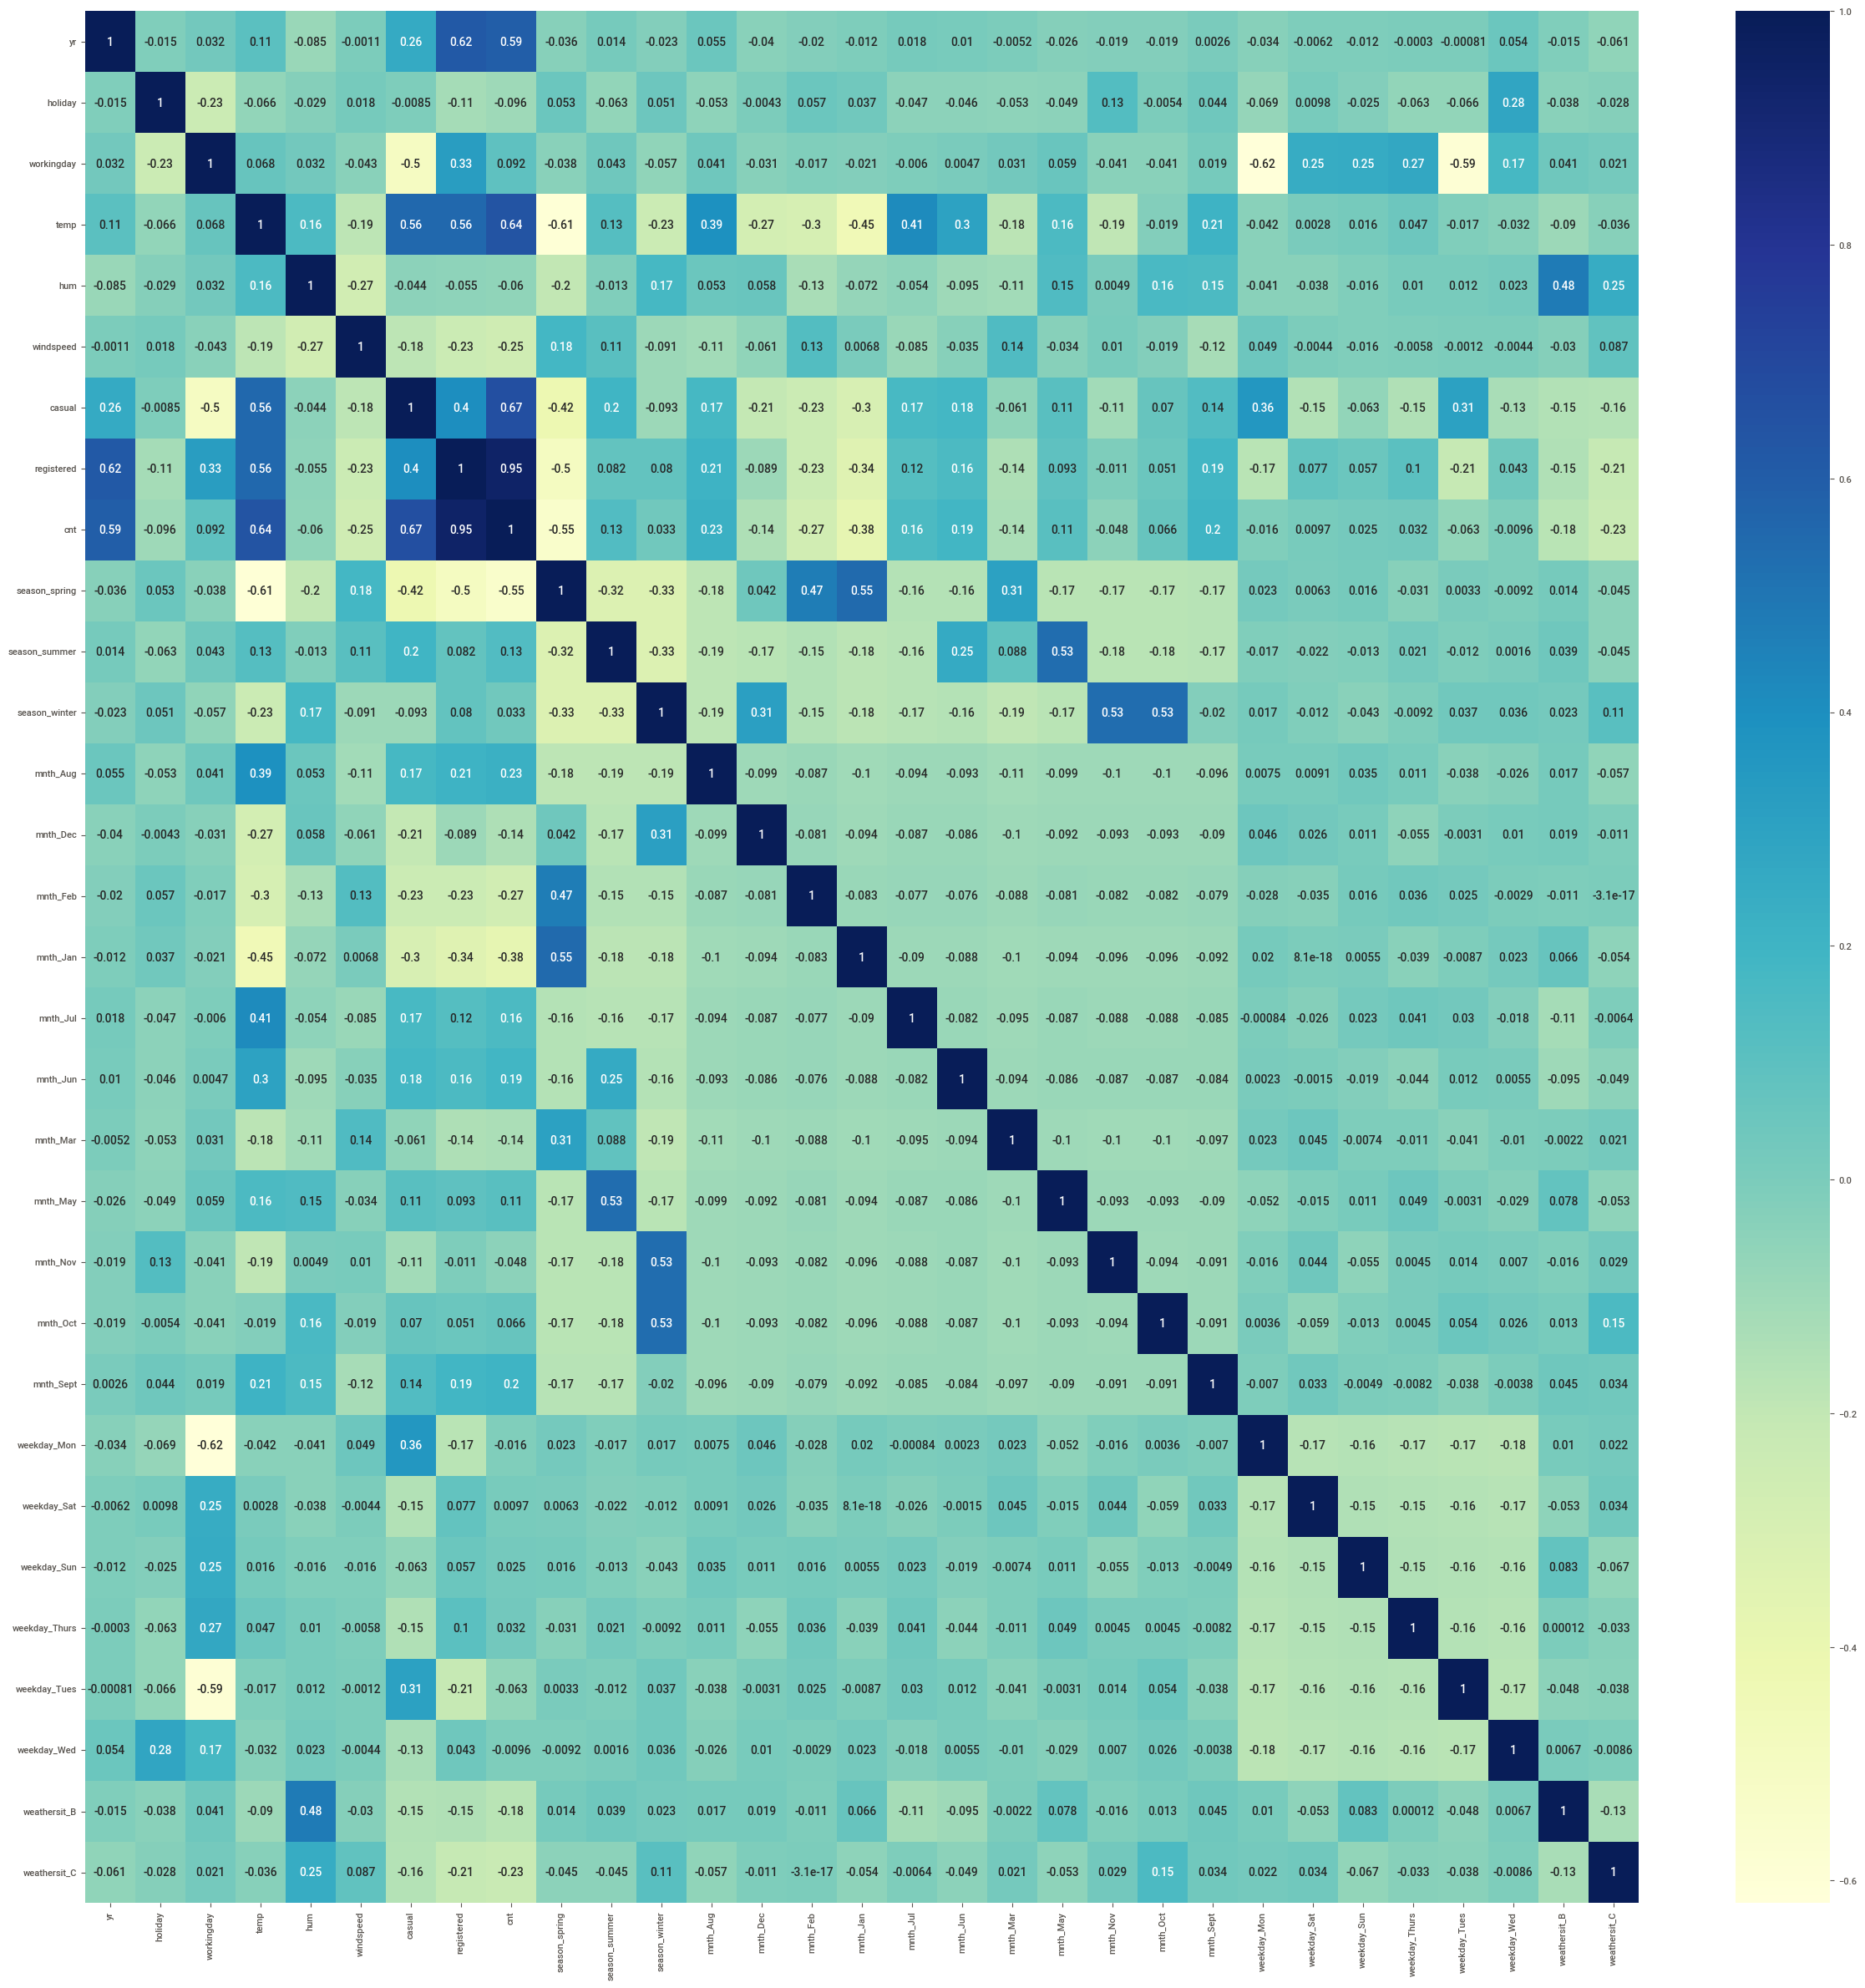

In [52]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

It is observed, `temp` seems to the correlated to `cnt` the most, after 'casual' and 'registered'. Let's see a pairplot for `temp` vs `cnt`.

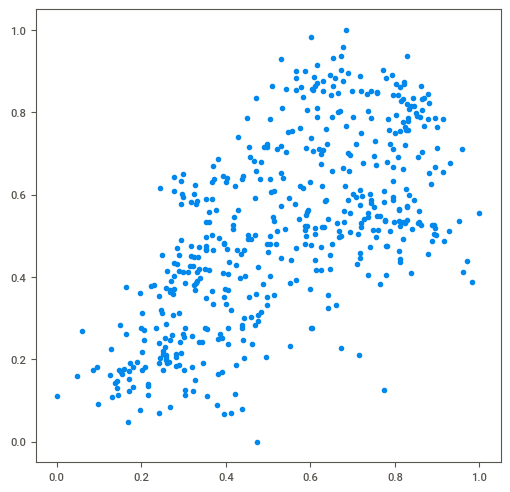

In [53]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### Dividing into X and Y sets for the model building

In [54]:
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [55]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [56]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [57]:
X_train.shape

(510, 28)

### Building the first model with all the features

Let's now build our first model with all the features.

In [58]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train) #adding the constant for enabling more degree of freedom in our model

lr = sm.OLS(y_train, X_train_lm).fit() # applying ordinary least sqaure mehtod

lr.params #checking the pramaeters

const            0.242930
yr               0.232116
holiday          0.006726
workingday       0.093651
temp             0.450562
hum             -0.151340
windspeed       -0.186453
season_spring   -0.048159
season_summer    0.038725
season_winter    0.105847
mnth_Aug         0.014404
mnth_Dec        -0.045586
mnth_Feb        -0.032282
mnth_Jan        -0.062777
mnth_Jul        -0.040350
mnth_Jun        -0.002972
mnth_Mar         0.001045
mnth_May         0.023940
mnth_Nov        -0.041851
mnth_Oct         0.007534
mnth_Sept        0.081060
weekday_Mon      0.098544
weekday_Sat     -0.003849
weekday_Sun      0.005388
weekday_Thurs   -0.013502
weekday_Tues     0.044008
weekday_Wed     -0.015519
weathersit_B    -0.061066
weathersit_C    -0.257443
dtype: float64

In [59]:
# Instantiating the model
lm = LinearRegression()

# Fitting the model to training set
lm.fit(X_train, y_train)

LinearRegression()

In [60]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.32115721e-01  6.45074487e+12  6.45074487e+12  4.89257812e-01
 -1.46972656e-01 -1.20510101e-01 -1.43066406e-01 -5.46875000e-02
  7.56835938e-02 -9.22851562e-02 -2.80761719e-02 -2.36816406e-02
 -2.79541016e-02 -1.06567383e-01  7.75146484e-03  7.71179199e-02
  3.08837891e-02 -1.01318359e-01 -2.41699219e-02  3.83148193e-02
  6.45074487e+12 -2.38952637e-02  6.28662109e-03  3.84635925e-02
  6.45074487e+12 -3.56445312e-02 -4.94384766e-02 -2.60009766e-01]
-6450744873141.619


In [61]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 14 Feb 2023   Prob (F-statistic):          8.74e-182
Time:                        23:57:29   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2429      0.035      6.854      0.000       0.173       0.313
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0067      0.024      0.278      0.781      -0.041       0.054
workingday        0.0937      0.012      7.783      0.000       0.070       0.117
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter     0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul         -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun         -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sept         0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon       0.0985      0.013      7.300      0.000       0.072       0.125
weekday_Sat      -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun       0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thurs    -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tues      0.0440      0.014      3.213      0.001       0.017       0.071
weekday_Wed      -0.0155      0.015     -1.064      0.288      -0.044       0.013
weathersit_B     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_C     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.54e+15
================================================================

This model has an Adjusted R-squared value of **84.5%** which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable, in order to avoid overfitting scenarios 

#### Model Building Using RFE

Now, we have close to 28 features.We will build a model using recursive feature elimination to select features. We'll first start off with 15 number of features (considering the p-values of different features), and then we will use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [62]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=15,step=1)

# Fitting the model with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True  True  True  True  True False False False
 False  True False False False False False  True  True False False False
  True False  True  True]
[ 1  1  1  1  1  1  1  1  1  7  4  5  2  1 10 11  6  3  9  1  1 13 14  8
  1 12  1  1]


#### Model Building and Evaluation 

Let's now check the summary of this model using `statsmodels`.

In [63]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sept,weekday_Mon,weekday_Tues,weathersit_B,weathersit_C
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,1,0


In [64]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 14 Feb 2023   Prob (F-statistic):          1.13e-191
Time:                        23:57:29   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1989      0.028      7.181

Note that the new model built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all the features. It has gone from **84.5%** to **84.3%**. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

In [65]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
a=X_train_rfe1.drop('const',axis=1) #dropping the constant varibale which was added earlier

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.69
11,weekday_Mon,12.20
12,weekday_Tues,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.61
4,hum,1.91
13,weathersit_B,1.57


In [68]:
from sklearn.feature_selection import RFE

In [69]:
#  applying RFE with 10 features
lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select = 10)

# Fit with 10 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True  True  True  True  True  True  True False False False False False
 False False False False False False False False  True False False False
  True False False  True]
[ 1  1  1  1  1  1  1  6  3 12  9 10  7  2 15 16 11  8 14  4  1 18 19 13
  1 17  5  1]


In [70]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 8 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,weekday_Mon,weekday_Tues,weathersit_C
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,1,0,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,1,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0


In [71]:
# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     238.4
Date:                Tue, 14 Feb 2023   Prob (F-statistic):          1.40e-174
Time:                        23:57:29   Log-Likelihood:                 463.33
No. Observations:                 510   AIC:                            -906.7
Df Residuals:                     500   BIC:                            -864.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3308      0.024     13.513

Now let's check the VIF for these selected features and decide further.

In [72]:
b=X_train_rfe2.drop('const',axis=1)

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,32.60
7,weekday_Mon,8.04
8,weekday_Tues,7.69
1,holiday,2.13
3,temp,1.63
6,season_spring,1.62
4,hum,1.21
5,windspeed,1.14
9,weathersit_C,1.10
0,yr,1.03


From the model summary above, mostly all variables have p-value < 0.05 and from the p-value perspective, mostly all variables seem significant, except one (holiday). But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.

So let's try removing 'workingday' first having the maximum VIF and then check for it again. Dropping this variable may result in a change in other VIFs which are high.

In [74]:
# Let's drop the 'workingday' column
X_train_rfe2.drop("workingday",axis=1,inplace=True)
X_train_rfe2

,const,yr,holiday,temp,hum,windspeed,season_spring,weekday_Mon,weekday_Tues,weathersit_C
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,1,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.605840,0.355596,0,0,0,0
578,1.0,1,0,0.863973,0.679690,0.187140,0,0,0,0
53,1.0,0,0,0.202618,0.435939,0.111379,1,0,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,0,1,0,0


In [75]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 9 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     238.4
Date:                Tue, 14 Feb 2023   Prob (F-statistic):          1.40e-174
Time:                        23:57:29   Log-Likelihood:                 463.33
No. Observations:                 510   AIC:                            -906.7
Df Residuals:                     500   BIC:                            -864.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4404      0.030     14.540

The model seems to be doing a good job. Let's also quickly take a look at the VIF values.

In [76]:
c=X_train_rfe2.drop('const',axis=1)

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,9.94
2,temp,8.40
4,windspeed,3.91
0,yr,2.03
5,season_spring,1.79
6,weekday_Mon,1.22
7,weekday_Tues,1.21
8,weathersit_C,1.11
1,holiday,1.04


The Variable 'hum' has a high VIF value. Let's drop it and re-evaluate our model

In [78]:
# Let's drop the 'hum' column as the VIF is high
X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,yr,holiday,temp,windspeed,season_spring,weekday_Mon,weekday_Tues,weathersit_C
653,1.0,1,0,0.509887,0.300794,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,1,0,0
728,1.0,1,0,0.245101,0.663106,1,0,1,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0
...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0


In [79]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 8 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     242.4
Date:                Tue, 14 Feb 2023   Prob (F-statistic):          7.54e-167
Time:                        23:57:29   Log-Likelihood:                 442.26
No. Observations:                 510   AIC:                            -866.5
Df Residuals:                     501   BIC:                            -828.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2856      0.020     14.441

Let's recheck the VIF values of the remaining features

In [80]:
c=X_train_rfe2.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.71
2,temp,3.49
0,yr,2.02
4,season_spring,1.52
5,weekday_Mon,1.21
6,weekday_Tues,1.19
7,weathersit_C,1.05
1,holiday,1.04


All the remaining features have the VIF values under permissible range. However, the variable 'weekday_Mon' has a high p-value, indicating that its insignficant. Lets drop it as well and re-evaluate our model

In [81]:
# Let's drop the 'weekday_Mon' column as only its p-value is high
X_train_rfe2.drop("weekday_Mon",axis=1,inplace=True)
X_train_rfe2

,const,yr,holiday,temp,windspeed,season_spring,weekday_Tues,weathersit_C
653,1.0,1,0,0.509887,0.300794,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0
728,1.0,1,0,0.245101,0.663106,1,1,0
482,1.0,1,0,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0


In [82]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 7 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     277.0
Date:                Tue, 14 Feb 2023   Prob (F-statistic):          6.72e-168
Time:                        23:57:29   Log-Likelihood:                 441.82
No. Observations:                 510   AIC:                            -867.6
Df Residuals:                     502   BIC:                            -833.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2880      0.020     14.701

In [83]:
c=X_train_rfe2.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.66
2,temp,3.43
0,yr,2.02
4,season_spring,1.51
5,weekday_Tues,1.16
6,weathersit_C,1.05
1,holiday,1.03


All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared` value has dropped from `84.5%` with **28 variables** to just `79.1%` using **7 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [84]:
y_train_cnt = lm3.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

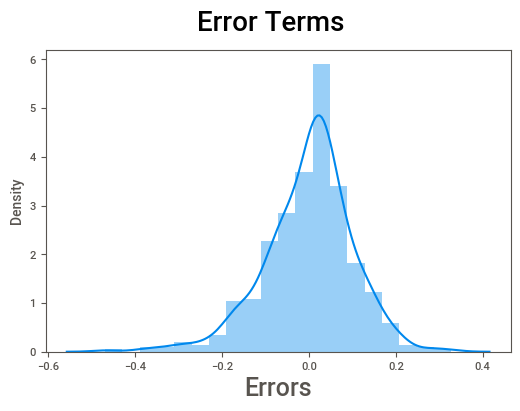

In [85]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)                         

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [86]:
X_train_rfe2

,const,yr,holiday,temp,windspeed,season_spring,weekday_Tues,weathersit_C
653,1.0,1,0,0.509887,0.300794,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0
728,1.0,1,0,0.245101,0.663106,1,1,0
482,1.0,1,0,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0


In [87]:
# let's recall the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [89]:
df_test[var] = scaler.transform(df_test[var])

In [90]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [91]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [92]:
# Let's check the list 'col2' which had the 7 variables RFE had selected
col2=c.columns
col2

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'weekday_Tues',
       'weathersit_C'],
      dtype='object')

In [93]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col2]

In [94]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   holiday        219 non-null    int64  
 3   temp           219 non-null    float64
 4   windspeed      219 non-null    float64
 5   season_spring  219 non-null    uint8  
 6   weekday_Tues   219 non-null    uint8  
 7   weathersit_C   219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(3)
memory usage: 10.9 KB


In [95]:
# Making predictions
y_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

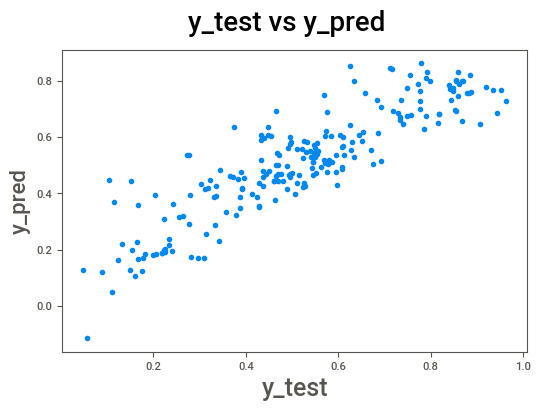

In [96]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [97]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.78174061328764

Thus, for the model with 7 variables, the r-squared on training and test data is about 79.4% and 78.2% respectively. The adjusted r-squared on the train set is about is about 79.1%.

#### Checking the correlations between the final predictor variables

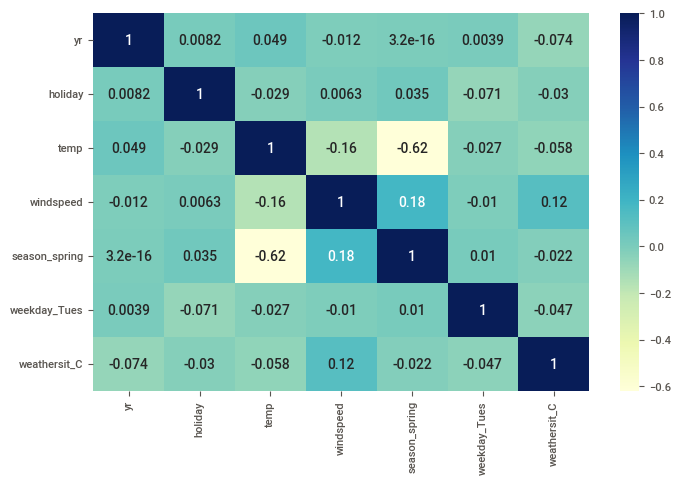

In [98]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(BS_day[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

This is the simplest model that we could build. The final predictors seem to have fairly low correlations amongst themselves. 

Thus, the final model consists of the 7 variables mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.



In [99]:
cor = BS_day[col2].corr()
cor

,yr,holiday,temp,windspeed,season_spring,weekday_Tues,weathersit_C
yr,1.000000e+00,0.008195,0.048789,-0.011624,3.225068e-16,0.003904,-0.073758
holiday,8.195345e-03,1.000000,-0.028764,0.006257,3.464187e-02,-0.070541,-0.029619
temp,4.878919e-02,-0.028764,1.000000,-0.158186,-6.194080e-01,-0.026802,-0.058461
windspeed,-1.162435e-02,0.006257,-0.158186,1.000000,1.788801e-01,-0.010429,0.117332
season_spring,3.225068e-16,0.034642,-0.619408,0.178880,1.000000e+00,0.010049,-0.022400
weekday_Tues,3.903600e-03,-0.070541,-0.026802,-0.010429,1.004923e-02,1.000000,-0.047187
weathersit_C,-7.375810e-02,-0.029619,-0.058461,0.117332,-2.240000e-02,-0.047187,1.000000
